     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

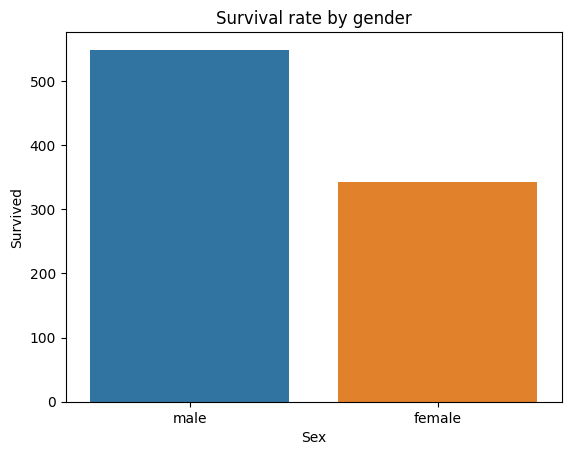

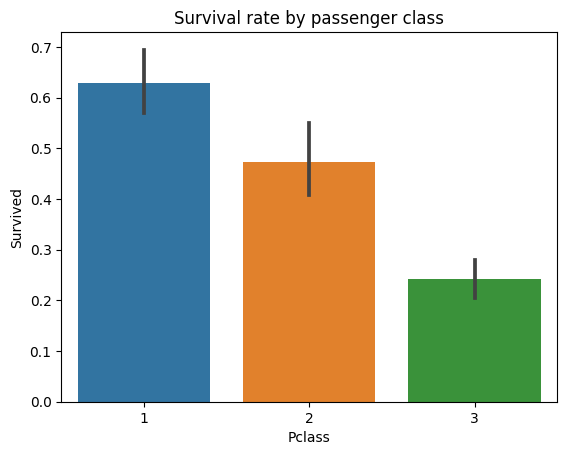

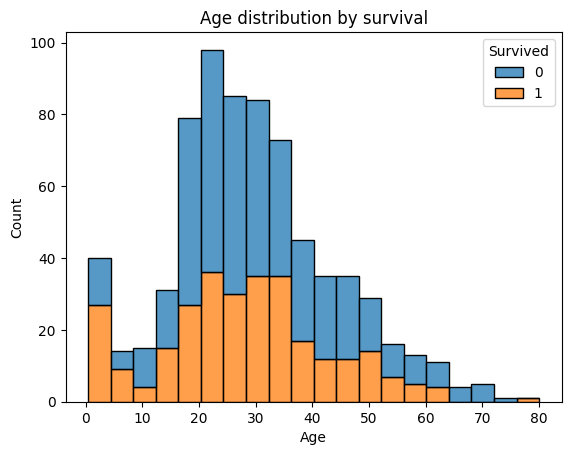

Optimization terminated successfully.
         Current function value: 0.508050
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  183
Model:                          Logit   Df Residuals:                      177
Method:                           MLE   Df Model:                            5
Date:                Sat, 12 Oct 2024   Pseudo R-squ.:                  0.1970
Time:                        21:29:58   Log-Likelihood:                -92.973
converged:                       True   LL-Null:                       -115.78
Covariance Type:            nonrobust   LLR p-value:                 1.092e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass         0.9035      0.270      3.343      0.001       0.374       1.433
Sex           -2.1268      0.

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


| 1         | 0.816     | 9.367     | 9.606     | 379.4     |
| 2         | 0.8104    | 13.18     | 3.248     | 120.2     |
| 3         | 0.7977    | 3.987     | 8.929     | 320.5     |
| 4         | 0.809     | 15.04     | 2.165     | 486.5     |
| 5         | 0.8104    | 17.15     | 3.699     | 131.8     |
| 6         | 0.8202    | 12.67     | 8.243     | 407.5     |
| 7         | 0.8146    | 20.0      | 10.0      | 50.0      |
| 8         | 0.8174    | 12.08     | 7.634     | 406.8     |
| 9         | 0.8174    | 13.2      | 9.667     | 410.8     |
| 10        | 0.816     | 16.21     | 10.0      | 406.8     |
| 11        | 0.8174    | 15.08     | 5.659     | 409.5     |
| 12        | 0.8286    | 9.785     | 4.691     | 412.5     |
| 13        | 0.8272    | 7.431     | 4.277     | 414.4     |
| 14        | 0.8245    | 10.85     | 2.0       | 415.1     |
| 15        | 0.8258    | 7.191     | 2.0       | 411.0     |
| 16        | 0.8103    | 5.209     | 7.497     | 411.3     |
| 17    

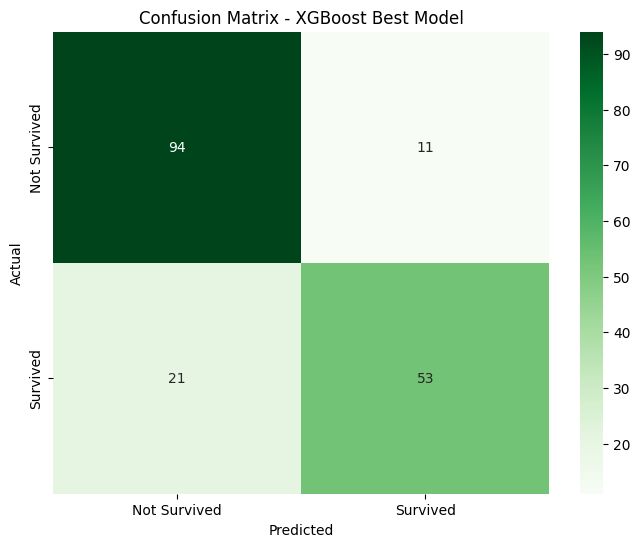

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from bayes_opt import BayesianOptimization
import xgboost as xgb
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

data_train = pd.read_csv(r"/kaggle/input/titanic/train.csv")
data_test = pd.read_csv("/kaggle/input/titanic/test.csv")
print(data_train)
print("-"* 80)
print(data_test)
print(data_train.isnull().sum())
print("-"*80)
print(data_test.isnull().sum())
data_test[data_test["Fare"].isna()]
data_test["Fare"].fillna(0, inplace = True)
data_test["Fare"].iloc[152]

sns.countplot(x="Survived", data=data_train)
plt.title('Survival Distribution')

sns.barplot(x="Sex", y="Survived", data=data_train)
plt.title("Survival rate by gender")
plt.show()

sns.barplot(x="Pclass", y="Survived", data=data_train)
plt.title("Survival rate by passenger class")
plt.show()

sns.histplot(data=data_train, x="Age", hue="Survived", multiple="stack")
plt.title("Age distribution by survival")
plt.show()

data_train.dtypes
data_train["Sex"] = LabelEncoder().fit_transform(data_train["Sex"]) 
data_test["Sex"] = LabelEncoder().fit_transform(data_test["Sex"])

data_train_eval_NA = data_train.dropna()
X_eval_NA = pd.DataFrame(data_train_eval_NA, columns = ["Pclass", "Sex", "Age", "SibSp","Parch", "Fare"]) 
y_eval_NA = data_train_eval_NA["Survived"]

logit_model = sm.Logit(y_eval_NA, X_eval_NA) 
result = logit_model.fit() 
print(result.summary())

data_train[["Fare", "Cabin", "Age"]] = data_train[["Fare", "Cabin", "Age"]].fillna(0)
data_test[["Fare", "Cabin", "Age"]] = data_test[["Fare", "Cabin", "Age"]].fillna(0)

data_train["Sex"] = LabelEncoder().fit_transform(data_train["Sex"])
data_test["Sex"] = LabelEncoder().fit_transform(data_test["Sex"])

X = pd.DataFrame(data_train, columns = ["Pclass", "Sex", "Fare", "Age"])
y = data_train["Survived"]
                 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)      
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

logreg = LogisticRegression(max_iter = 2000)
logreg.fit(X_train_scaled, y_train)

y_pred_val = logreg.predict(X_val)
baseline_accuracy = accuracy_score(y_val, y_pred_val)
print(f"Baseline Logistic Regression Accuracy: {baseline_accuracy:.4f}")

X_test = pd.DataFrame(data_test, columns = ["Pclass", "Sex", "Fare", "Age"])
X_test_scaled = scaler.transform(X_test)

y_pred_test = logreg.predict(X_test_scaled)
logreg_predictions = (y_pred_test > 0.5).astype("int64")
passenger_ids = data_test["PassengerId"].values
results = pd.DataFrame({"PassengerId" : passenger_ids, "Survived" : logreg_predictions})
results.to_csv("logreg_predictions.csv", index=False)


def rf_cv(n_estimators, max_depth, min_samples_split):
    rf = RandomForestClassifier(
        n_estimators=int(n_estimators), 
        max_depth=int(max_depth), 
        min_samples_split=int(min_samples_split), 
        random_state=42
    )
    return cross_val_score(rf, X_train, y_train, cv=5).mean()
pbounds_rf = {
    "n_estimators": (50, 500),
    "max_depth": (3, 20),
    "min_samples_split": (2, 10)
}
optimizer_rf = BayesianOptimization(f=rf_cv, pbounds=pbounds_rf, random_state=42)
optimizer_rf.maximize(init_points=5, n_iter=20)
best_params_rf = optimizer_rf.max["params"]
best_rf = RandomForestClassifier(
    n_estimators=int(best_params_rf["n_estimators"]),
    max_depth=int(best_params_rf["max_depth"]),
    min_samples_split=int(best_params_rf["min_samples_split"]),
    random_state=42
)
best_rf.fit(X_train, y_train)
predicted_values = best_rf.predict(X_test)
predictions_rf = (predicted_values > 0.5).astype("int64")
rf_predictions = pd.DataFrame({"PassengerId": passenger_ids, "Survived": predictions_rf})
rf_predictions.to_csv("rf_predictions.csv", index = False)


def xgb_cv(n_estimators, max_depth, learning_rate):
    xgboost_model = xgb.XGBClassifier(
        n_estimators=int(n_estimators), 
        max_depth=int(max_depth), 
        learning_rate=learning_rate, 
        objective='binary:logistic',
        use_label_encoder=False,
        eval_metric='logloss'
    )
    return cross_val_score(xgboost_model, X_train, y_train, cv=5).mean()
pbounds_xgb = {
    'n_estimators': (50, 500),
    'max_depth': (3, 20),
    'learning_rate': (0.01, 0.3)
}
optimizer_xgb = BayesianOptimization(f=xgb_cv, pbounds=pbounds_xgb, random_state=42)
optimizer_xgb.maximize(init_points=5, n_iter=20)
best_params_xgb = optimizer_xgb.max["params"]
best_xgb = xgb.XGBClassifier(
    n_estimators=int(best_params_xgb["n_estimators"]),
    max_depth=int(best_params_xgb["max_depth"]),
    learning_rate=best_params_xgb["learning_rate"],
    use_label_encoder=False,
    eval_metric="logloss"
)
best_xgb.fit(X_train, y_train)
predicted_values = best_xgb.predict(X_test)
predictions_xgb= (predicted_values > 0.5).astype("int64")
predicted_xgb = pd.DataFrame({"PassengerId": passenger_ids, "Survived": predictions_xgb})
predicted_xgb.to_csv("xgb_predictions.csv", index = False)


data_train[["Fare", "Cabin", "Age"]] = data_train[["Fare", "Cabin", "Age"]].fillna(0)
data_test[["Fare", "Cabin", "Age"]] = data_test[["Fare", "Cabin", "Age"]].fillna(0)
data_train["Embarked"] = data_train["Embarked"].fillna("A")
data_test["Embarked"] = data_test["Embarked"].fillna("A")

X = data_train[["Pclass", "Sex", "Fare", "Age", "Embarked"]]
y = data_train["Survived"]

X_encoded = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=2000)

rfe = RFECV(estimator=model, step=1, cv=5)
rfe.fit(X_train, y_train)

selected_features = X_train.columns[rfe.support_]
print("Selected features:", selected_features)


y_val_pred = best_xgb.predict(X_val)

conf_matrix = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_val, y_val_pred)
print("\nClassification Report:")
print(class_report)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix - XGBoost Best Model")
plt.show()